<a href="https://colab.research.google.com/github/moksh-m9u/supervised-learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
df= pd.read_csv('placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df = df.drop(df.columns[0], axis=1)

In [11]:
df.head()
df.shape

(100, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [14]:
import matplotlib.pyplot as plt


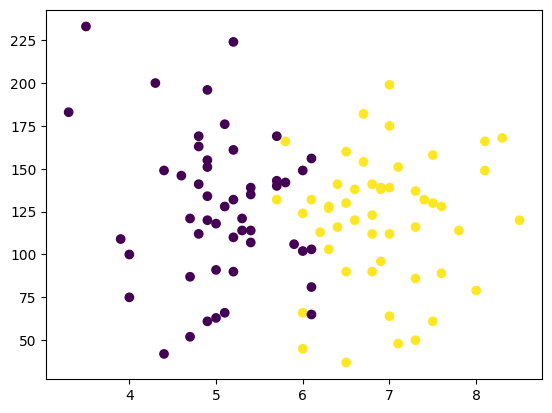

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
x= df.iloc[:,0:2]
y= df.iloc[:,-1]

In [17]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [22]:
x.shape
y.shape

(100,)

In [24]:
from sklearn.model_selection import train_test_split

In [29]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [30]:
x_train

,cgpa,iq
9,5.1,66.0
23,4.7,87.0
39,4.6,146.0
94,4.7,52.0
78,6.1,81.0
...,...,...
6,5.7,143.0
40,4.9,134.0
59,4.8,112.0
68,4.0,75.0


In [31]:
x_test

,cgpa,iq
22,4.9,120.0
43,6.8,141.0
58,8.0,79.0
86,5.1,128.0
10,6.0,45.0
3,7.4,132.0
41,5.4,114.0
29,7.0,112.0
13,6.4,116.0
84,5.7,169.0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf =LogisticRegression()

In [37]:
clf.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred= clf.predict(x_test)

In [41]:
y_test

,placement
22,0
43,1
58,1
86,0
10,1
3,1
41,0
29,1
13,1
84,0


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.9

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

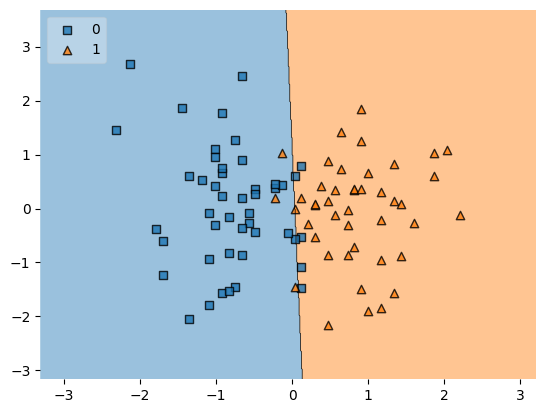

In [46]:
plot_decision_regions(x_train, y_train.values,clf=clf,legend=2)